In [4]:
csv_file='data/features_right_thigh.csv'

In [5]:
from falldetection.feature_extractor_workflow import extract_features_and_save, FeatureExtractorWorkflow

# extract_features_and_save(baseDir='data/FallDataSet', csv_file=csv_file)

In [6]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv(csv_file)
#display(data.isnull().sum().sum())
#display(data[data.isnull().any(axis=1)])

# Success - Display the first record
display(data.head(n=5))
data.dtypes

,Unnamed: 0,sensorFile,fall,Acc_X_min,Acc_X_max,Acc_X_mean,Acc_X_var,Acc_X_skew,Acc_X_kurtosis,Acc_X_autocorr_lag_1,Acc_X_autocorr_lag_2,Acc_X_autocorr_lag_3,Acc_X_autocorr_lag_4,Acc_X_autocorr_lag_5,Acc_X_autocorr_lag_6,Acc_X_autocorr_lag_7,Acc_X_autocorr_lag_8,Acc_X_autocorr_lag_9,Acc_X_autocorr_lag_10,Acc_X_autocorr_lag_11,Acc_Y_min,Acc_Y_max,Acc_Y_mean,Acc_Y_var,Acc_Y_skew,Acc_Y_kurtosis,Acc_Y_autocorr_lag_1,Acc_Y_autocorr_lag_2,Acc_Y_autocorr_lag_3,Acc_Y_autocorr_lag_4,Acc_Y_autocorr_lag_5,Acc_Y_autocorr_lag_6,Acc_Y_autocorr_lag_7,Acc_Y_autocorr_lag_8,Acc_Y_autocorr_lag_9,Acc_Y_autocorr_lag_10,Acc_Y_autocorr_lag_11,Acc_Z_min,Acc_Z_max,Acc_Z_mean,Acc_Z_var,Acc_Z_skew,Acc_Z_kurtosis,Acc_Z_autocorr_lag_1,Acc_Z_autocorr_lag_2,Acc_Z_autocorr_lag_3,Acc_Z_autocorr_lag_4,Acc_Z_autocorr_lag_5,Acc_Z_autocorr_lag_6,Acc_Z_autocorr_lag_7,Acc_Z_autocorr_lag_8,Acc_Z_autocorr_lag_9,Acc_Z_autocorr_lag_10,Acc_Z_autocorr_lag_11,Gyr_X_min,Gyr_X_max,Gyr_X_mean,Gyr_X_var,Gyr_X_skew,Gyr_X_kurtosis,Gyr_X_autocorr_lag_1,Gyr_X_autocorr_lag_2,Gyr_X_autocorr_lag_3,Gyr_X_autocorr_lag_4,Gyr_X_autocorr_lag_5,Gyr_X_autocorr_lag_6,Gyr_X_autocorr_lag_7,Gyr_X_autocorr_lag_8,Gyr_X_autocorr_lag_9,Gyr_X_autocorr_lag_10,Gyr_X_autocorr_lag_11,Gyr_Y_min,Gyr_Y_max,Gyr_Y_mean,Gyr_Y_var,Gyr_Y_skew,Gyr_Y_kurtosis,Gyr_Y_autocorr_lag_1,Gyr_Y_autocorr_lag_2,Gyr_Y_autocorr_lag_3,Gyr_Y_autocorr_lag_4,Gyr_Y_autocorr_lag_5,Gyr_Y_autocorr_lag_6,Gyr_Y_autocorr_lag_7,Gyr_Y_autocorr_lag_8,Gyr_Y_autocorr_lag_9,Gyr_Y_autocorr_lag_10,Gyr_Y_autocorr_lag_11,Gyr_Z_min,Gyr_Z_max,Gyr_Z_mean,Gyr_Z_var,Gyr_Z_skew,Gyr_Z_kurtosis,Gyr_Z_autocorr_lag_1,Gyr_Z_autocorr_lag_2,Gyr_Z_autocorr_lag_3,Gyr_Z_autocorr_lag_4,Gyr_Z_autocorr_lag_5,Gyr_Z_autocorr_lag_6,Gyr_Z_autocorr_lag_7,Gyr_Z_autocorr_lag_8,Gyr_Z_autocorr_lag_9,Gyr_Z_autocorr_lag_10,Gyr_Z_autocorr_lag_11,Mag_X_min,Mag_X_max,Mag_X_mean,Mag_X_var,Mag_X_skew,Mag_X_kurtosis,Mag_X_autocorr_lag_1,Mag_X_autocorr_lag_2,Mag_X_autocorr_lag_3,Mag_X_autocorr_lag_4,Mag_X_autocorr_lag_5,Mag_X_autocorr_lag_6,Mag_X_autocorr_lag_7,Mag_X_autocorr_lag_8,Mag_X_autocorr_lag_9,Mag_X_autocorr_lag_10,Mag_X_autocorr_lag_11,Mag_Y_min,Mag_Y_max,Mag_Y_mean,Mag_Y_var,Mag_Y_skew,Mag_Y_kurtosis,Mag_Y_autocorr_lag_1,Mag_Y_autocorr_lag_2,Mag_Y_autocorr_lag_3,Mag_Y_autocorr_lag_4,Mag_Y_autocorr_lag_5,Mag_Y_autocorr_lag_6,Mag_Y_autocorr_lag_7,Mag_Y_autocorr_lag_8,Mag_Y_autocorr_lag_9,Mag_Y_autocorr_lag_10,Mag_Y_autocorr_lag_11,Mag_Z_min,Mag_Z_max,Mag_Z_mean,Mag_Z_var,Mag_Z_skew,Mag_Z_kurtosis,Mag_Z_autocorr_lag_1,Mag_Z_autocorr_lag_2,Mag_Z_autocorr_lag_3,Mag_Z_autocorr_lag_4,Mag_Z_autocorr_lag_5,Mag_Z_autocorr_lag_6,Mag_Z_autocorr_lag_7,Mag_Z_autocorr_lag_8,Mag_Z_autocorr_lag_9,Mag_Z_autocorr_lag_10,Mag_Z_autocorr_lag_11
0,0,../../data/FallDataSet/209/Testler Export/813/...,False,8.030701,10.127258,9.067593,0.266656,-0.171129,-0.919953,0.248744,0.221720,0.201647,0.186368,0.169107,0.155824,0.147208,0.136408,0.123149,0.109615,0.099428,0.347900,1.450825,0.869205,0.061220,0.023209,-0.556630,0.056294,0.048496,0.041883,0.039141,0.038966,0.040041,0.041059,0.041021,0.039896,0.037013,0.032154,2.986836,5.015564,3.920029,0.491656,0.433932,-1.419709,0.475478,0.454742,0.435691,0.416500,0.394523,0.371950,0.349767,0.328469,0.304696,0.280887,0.259479,-0.083494,0.155068,-0.011506,0.001836,1.603520,3.704183,0.001452,0.000871,0.000427,0.000170,0.000067,-0.000007,-0.000065,-0.000096,-0.000069,-0.000135,-0.000182,-0.242425,0.086403,-0.047935,0.006193,-1.024068,-0.069452,0.005770,0.005039,0.004189,0.003316,0.002455,0.001762,0.001181,0.000704,0.000306,0.000028,-0.000159,-0.097132,0.148964,0.010077,0.002822,0.999498,0.840014,0.002673,0.002399,0.002113,0.001840,0.001600,0.001385,0.001184,0.000959,0.000696,0.000412,0.000137,-0.664551,-0.492920,-0.595123,0.004133,0.497284,-1.336982,0.004062,0.003975,0.003873,0.003760,0.003635,0.003500,0.003362,0.003220,0.003076,0.002935,0.002793,0.086914,0.158936,0.120946,0.000487,0.038112,-1.215131,0.000472,0.000457,0.000441,0.000426,0.000410,0.000393,0.000374,

Unnamed: 0                 int64
sensorFile                object
fall                        bool
Acc_X_min                float64
Acc_X_max                float64
Acc_X_mean               float64
Acc_X_var                float64
Acc_X_skew               float64
Acc_X_kurtosis           float64
Acc_X_autocorr_lag_1     float64
Acc_X_autocorr_lag_2     float64
Acc_X_autocorr_lag_3     float64
Acc_X_autocorr_lag_4     float64
Acc_X_autocorr_lag_5     float64
Acc_X_autocorr_lag_6     float64
Acc_X_autocorr_lag_7     float64
Acc_X_autocorr_lag_8     float64
Acc_X_autocorr_lag_9     float64
Acc_X_autocorr_lag_10    float64
Acc_X_autocorr_lag_11    float64
Acc_Y_min                float64
Acc_Y_max                float64
Acc_Y_mean               float64
Acc_Y_var                float64
Acc_Y_skew               float64
Acc_Y_kurtosis           float64
Acc_Y_autocorr_lag_1     float64
Acc_Y_autocorr_lag_2     float64
Acc_Y_autocorr_lag_3     float64
Acc_Y_autocorr_lag_4     float64
Acc_Y_auto

In [4]:
# TODO: Total number of records
n_records = len(data)

n_fall = len(data[data['fall'] == True])
n_adl = len(data[data['fall'] == False])

def fall_percent(y):
    return (len(y[y == True]) / len(y)) * 100    

# Print the results
print("Total number of records: {}".format(n_records))
print("Number of falls: {}".format(n_fall))
print("Number of ADLs: {}".format(n_adl))
print("Percentage of falls: {:.2f}%".format(fall_percent(data['fall'])))

Total number of records: 3296
Number of falls: 1822
Number of ADLs: 1474
Percentage of falls: 55.28%


In [5]:
y = data['fall']
X = data.drop(columns=['fall', 'sensorFile', 'Unnamed: 0'])
X.head()

,Acc_X_min,Acc_X_max,Acc_X_mean,Acc_X_var,Acc_X_skew,Acc_X_kurtosis,Acc_X_autocorr_lag_1,Acc_X_autocorr_lag_2,Acc_X_autocorr_lag_3,Acc_X_autocorr_lag_4,Acc_X_autocorr_lag_5,Acc_X_autocorr_lag_6,Acc_X_autocorr_lag_7,Acc_X_autocorr_lag_8,Acc_X_autocorr_lag_9,Acc_X_autocorr_lag_10,Acc_X_autocorr_lag_11,Acc_Y_min,Acc_Y_max,Acc_Y_mean,Acc_Y_var,Acc_Y_skew,Acc_Y_kurtosis,Acc_Y_autocorr_lag_1,Acc_Y_autocorr_lag_2,Acc_Y_autocorr_lag_3,Acc_Y_autocorr_lag_4,Acc_Y_autocorr_lag_5,Acc_Y_autocorr_lag_6,Acc_Y_autocorr_lag_7,Acc_Y_autocorr_lag_8,Acc_Y_autocorr_lag_9,Acc_Y_autocorr_lag_10,Acc_Y_autocorr_lag_11,Acc_Z_min,Acc_Z_max,Acc_Z_mean,Acc_Z_var,Acc_Z_skew,Acc_Z_kurtosis,Acc_Z_autocorr_lag_1,Acc_Z_autocorr_lag_2,Acc_Z_autocorr_lag_3,Acc_Z_autocorr_lag_4,Acc_Z_autocorr_lag_5,Acc_Z_autocorr_lag_6,Acc_Z_autocorr_lag_7,Acc_Z_autocorr_lag_8,Acc_Z_autocorr_lag_9,Acc_Z_autocorr_lag_10,Acc_Z_autocorr_lag_11,Gyr_X_min,Gyr_X_max,Gyr_X_mean,Gyr_X_var,Gyr_X_skew,Gyr_X_kurtosis,Gyr_X_autocorr_lag_1,Gyr_X_autocorr_lag_2,Gyr_X_autocorr_lag_3,Gyr_X_autocorr_lag_4,Gyr_X_autocorr_lag_5,Gyr_X_autocorr_lag_6,Gyr_X_autocorr_lag_7,Gyr_X_autocorr_lag_8,Gyr_X_autocorr_lag_9,Gyr_X_autocorr_lag_10,Gyr_X_autocorr_lag_11,Gyr_Y_min,Gyr_Y_max,Gyr_Y_mean,Gyr_Y_var,Gyr_Y_skew,Gyr_Y_kurtosis,Gyr_Y_autocorr_lag_1,Gyr_Y_autocorr_lag_2,Gyr_Y_autocorr_lag_3,Gyr_Y_autocorr_lag_4,Gyr_Y_autocorr_lag_5,Gyr_Y_autocorr_lag_6,Gyr_Y_autocorr_lag_7,Gyr_Y_autocorr_lag_8,Gyr_Y_autocorr_lag_9,Gyr_Y_autocorr_lag_10,Gyr_Y_autocorr_lag_11,Gyr_Z_min,Gyr_Z_max,Gyr_Z_mean,Gyr_Z_var,Gyr_Z_skew,Gyr_Z_kurtosis,Gyr_Z_autocorr_lag_1,Gyr_Z_autocorr_lag_2,Gyr_Z_autocorr_lag_3,Gyr_Z_autocorr_lag_4,Gyr_Z_autocorr_lag_5,Gyr_Z_autocorr_lag_6,Gyr_Z_autocorr_lag_7,Gyr_Z_autocorr_lag_8,Gyr_Z_autocorr_lag_9,Gyr_Z_autocorr_lag_10,Gyr_Z_autocorr_lag_11,Mag_X_min,Mag_X_max,Mag_X_mean,Mag_X_var,Mag_X_skew,Mag_X_kurtosis,Mag_X_autocorr_lag_1,Mag_X_autocorr_lag_2,Mag_X_autocorr_lag_3,Mag_X_autocorr_lag_4,Mag_X_autocorr_lag_5,Mag_X_autocorr_lag_6,Mag_X_autocorr_lag_7,Mag_X_autocorr_lag_8,Mag_X_autocorr_lag_9,Mag_X_autocorr_lag_10,Mag_X_autocorr_lag_11,Mag_Y_min,Mag_Y_max,Mag_Y_mean,Mag_Y_var,Mag_Y_skew,Mag_Y_kurtosis,Mag_Y_autocorr_lag_1,Mag_Y_autocorr_lag_2,Mag_Y_autocorr_lag_3,Mag_Y_autocorr_lag_4,Mag_Y_autocorr_lag_5,Mag_Y_autocorr_lag_6,Mag_Y_autocorr_lag_7,Mag_Y_autocorr_lag_8,Mag_Y_autocorr_lag_9,Mag_Y_autocorr_lag_10,Mag_Y_autocorr_lag_11,Mag_Z_min,Mag_Z_max,Mag_Z_mean,Mag_Z_var,Mag_Z_skew,Mag_Z_kurtosis,Mag_Z_autocorr_lag_1,Mag_Z_autocorr_lag_2,Mag_Z_autocorr_lag_3,Mag_Z_autocorr_lag_4,Mag_Z_autocorr_lag_5,Mag_Z_autocorr_lag_6,Mag_Z_autocorr_lag_7,Mag_Z_autocorr_lag_8,Mag_Z_autocorr_lag_9,Mag_Z_autocorr_lag_10,Mag_Z_autocorr_lag_11
0,8.030701,10.127258,9.067593,0.266656,-0.171129,-0.919953,0.248744,0.221720,0.201647,0.186368,0.169107,0.155824,0.147208,0.136408,0.123149,0.109615,0.099428,0.347900,1.450825,0.869205,0.061220,0.023209,-0.556630,0.056294,0.048496,0.041883,0.039141,0.038966,0.040041,0.041059,0.041021,0.039896,0.037013,0.032154,2.986836,5.015564,3.920029,0.491656,0.433932,-1.419709,0.475478,0.454742,0.435691,0.416500,0.394523,0.371950,0.349767,0.328469,0.304696,0.280887,0.259479,-0.083494,0.155068,-0.011506,0.001836,1.603520,3.704183,0.001452,0.000871,0.000427,0.000170,0.000067,-0.000007,-0.000065,-0.000096,-0.000069,-0.000135,-0.000182,-0.242425,0.086403,-0.047935,0.006193,-1.024068,-0.069452,0.005770,0.005039,0.004189,0.003316,0.002455,0.001762,0.001181,0.000704,0.000306,0.000028,-0.000159,-0.097132,0.148964,0.010077,0.002822,0.999498,0.840014,0.002673,0.002399,0.002113,0.001840,0.001600,0.001385,0.001184,0.000959,0.000696,0.000412,0.000137,-0.664551,-0.492920,-0.595123,0.004133,0.497284,-1.336982,0.004062,0.003975,0.003873,0.003760,0.003635,0.003500,0.003362,0.003220,0.003076,0.002935,0.002793,0.086914,0.158936,0.120946,0.000487,0.038112,-1.215131,0.000472,0.000457,0.000441,0.000426,0.000410,0.000393,0.000374,0.000358,0.000341,0.000326,0.000312,-1.235596,-1.136475,-1.184546,0.001102,-0.135640,

In [6]:
1./len(X.columns)

0.006535947712418301

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 815)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
    
print("Percentage of train falls: {:.2f}%".format(fall_percent(y_train)))
print("Percentage of test falls: {:.2f}%".format(fall_percent(y_test)))

Training set has 2636 samples.
Testing set has 660 samples.
Percentage of train falls: 55.01%
Percentage of test falls: 56.36%


In [6]:
from falldetection.feature_extractor_workflow_4_LSTM import extract_features_4_LSTM
from falldetection.sensor import Sensor

X, y = extract_features_4_LSTM(
            sensor=Sensor.RIGHT_THIGH,
            baseDir='data/FallDataSet',
            sensor_files_to_exclude=['208/Testler Export/805/Test_1/340539.txt',
                                     '203/Testler Export/813/Test_1/340539.txt',
                                     '103/Testler Export/911/Test_5/340539.txt',
                                     '109/Testler Export/901/Test_6/340539.txt',
                                     '108/Testler Export/918/Test_5/340539.txt',
                                     '208/Testler Export/904/Test_6/340539.txt',
                                     '207/Testler Export/904/Test_4/340539.txt'],
            columns=['Acc_X'])

In [23]:
y[100]

array([ True])

In [24]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [25]:
# create the model
data_dim = X.shape[2] # später mal = number of features = [{Acc_x, Acc_y, Acc_z, Gyr_*, Max_*, }] = 9
timesteps = X.shape[1] # später mal 101 = (half_window_size:=50) * 2 + 1
num_classes = 1 # fall?

model = Sequential()
# model.add(LSTM(100, input_shape=(timesteps, data_dim)))
# model.add(Dense(num_classes, activation='sigmoid'))
# or:
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(timesteps, data_dim)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 101, 32)           128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
from sklearn.model_selection import train_test_split

# Generate dummy
numpy.random.seed(815)
num_samples = 10000
#X = np.random.random((num_samples, timesteps, data_dim))
#y = np.random.choice([False, True], size=(num_samples, 1))

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 815)

In [27]:
X_test[:2]

array([[[11.17553711],
        [11.77027225],
        [12.07885742],
        [10.24603844],
        [ 7.77435303],
        [ 7.06233978],
        [ 8.56170654],
        [10.02719402],
        [ 9.715271  ],
        [ 8.46140385],
        [ 7.77740479],
        [ 7.39831924],
        [ 7.42034912],
        [ 7.68535137],
        [ 8.16497803],
        [ 8.96670818],
        [ 9.24072266],
        [ 9.65454578],
        [10.18066406],
        [10.9184742 ],
        [ 9.60235596],
        [ 8.14948082],
        [ 6.94274902],
        [ 7.81974792],
        [ 9.44824219],
        [ 9.67683792],
        [ 8.39996338],
        [ 6.94506168],
        [ 5.89904785],
        [ 4.74448204],
        [ 2.70996094],
        [ 1.390028  ],
        [ 1.15814209],
        [ 4.21116352],
        [11.41052246],
        [15.6014204 ],
        [ 8.44116211],
        [ 3.96728516],
        [ 6.83288574],
        [13.45562935],
        [17.2668457 ],
        [21.7924118 ],
        [15.5380249 ],
        [ 9

In [28]:
y_test[:3]

array([[ True],
       [ True],
       [ True]])

In [29]:
model.fit(X_train, y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, y_test))

Train on 2636 samples, validate on 660 samples
Epoch 1/20
2636/2636 [==============================] - 2s 885us/step - loss: 0.4773 - acc: 0.7940 - val_loss: 0.3425 - val_acc: 0.8485
Epoch 2/20
2636/2636 [==============================] - 2s 693us/step - loss: 0.3256 - acc: 0.8722 - val_loss: 0.2205 - val_acc: 0.9136
Epoch 3/20
2636/2636 [==============================] - 2s 690us/step - loss: 0.1527 - acc: 0.9480 - val_loss: 0.0839 - val_acc: 0.9758
Epoch 4/20
2636/2636 [==============================] - 2s 699us/step - loss: 0.0868 - acc: 0.9761 - val_loss: 0.0617 - val_acc: 0.9864
Epoch 5/20
2636/2636 [==============================] - 2s 700us/step - loss: 0.0552 - acc: 0.9848 - val_loss: 0.0559 - val_acc: 0.9864
Epoch 6/20
2636/2636 [==============================] - 2s 735us/step - loss: 0.0604 - acc: 0.9814 - val_loss: 0.0583 - val_acc: 0.9879
Epoch 7/20
2636/2636 [==============================] - 2s 709us/step - loss: 0.0689 - acc: 0.9799 - val_loss: 0.0714 - val_acc: 0.9894
E

In [30]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
# scores, model.metrics_names

660/660 [==============================] - 0s 259us/step
Accuracy: 98.18%


${\mathit{ACC}}=\frac{\mathit{TP}+\mathit{TN}}{\mathit{TP}+\mathit{FP}+\mathit{FN}+\mathit{TN}}$

In [9]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# clf = SVC(C=100, gamma=0.0001, random_state=815)
clf = SVC(C=10, random_state=815)
# clf = DecisionTreeClassifier(random_state=815)
# clf = RandomForestClassifier(random_state=815)
# clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=815, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
predictions_test = clf.predict(X_test)

In [11]:
from sklearn.metrics import fbeta_score

score = fbeta_score(y_test, predictions_test, beta=2.0)
score

0.9914712153518123

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions_test)

0.9757575757575757

In [13]:
from sklearn.metrics import confusion_matrix

display(confusion_matrix(y_test, predictions_test))

tn, fp, fn, tp = confusion_matrix(y_test, predictions_test).ravel()
(tn, fp, fn, tp)

array([[272,  16],
       [  0, 372]])

(272, 16, 0, 372)

In [14]:
always_fall_prediction = np.array([True]*len(X_test))
always_adl_prediction = np.array([False]*len(X_test))
random_prediction = np.random.choice([True, False], len(X_test))

print("accuracy_score(always_fall_prediction): ", accuracy_score(y_test, always_fall_prediction))
print("accuracy_score(always_adl_prediction): ", accuracy_score(y_test, always_adl_prediction))
print("accuracy_score(random_prediction): ", accuracy_score(y_test, random_prediction))

accuracy_score(always_fall_prediction):  0.5636363636363636
accuracy_score(always_adl_prediction):  0.43636363636363634
accuracy_score(random_prediction):  0.47575757575757577


In [15]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test, beta): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=beta)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=beta)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

SVC trained on 26 samples.
SVC trained on 263 samples.
SVC trained on 2636 samples.
DecisionTreeClassifier trained on 26 samples.
DecisionTreeClassifier trained on 263 samples.
DecisionTreeClassifier trained on 2636 samples.
RandomForestClassifier trained on 26 samples.
RandomForestClassifier trained on 263 samples.
RandomForestClassifier trained on 2636 samples.
KNeighborsClassifier trained on 26 samples.
KNeighborsClassifier trained on 263 samples.
KNeighborsClassifier trained on 2636 samples.


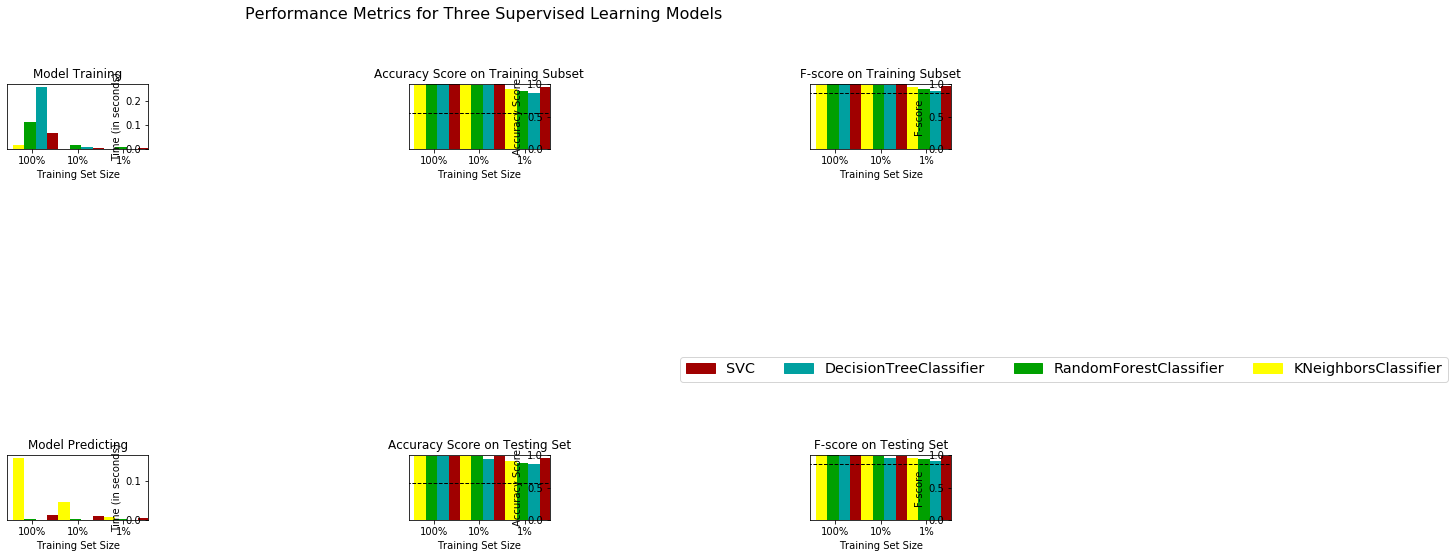

In [16]:
import visuals as vs

# TODO: Initialize the three models
# clf = RandomForestClassifier(random_state=815)
# clf = KNeighborsClassifier(n_neighbors=7)
clf_A = SVC(C=100, gamma=0.0001, random_state=815)
clf_B = DecisionTreeClassifier(random_state = 815)
clf_C = RandomForestClassifier(random_state=815)
clf_D = KNeighborsClassifier(n_neighbors=7)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(10/100 * samples_100)
samples_1 = int(1/100 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test, beta=2.0)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy_score(y_test, always_fall_prediction), fbeta_score(y_test, always_fall_prediction, beta=2.0))

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
print(pca.explained_variance_ratio_)
#print(pca.components_)

[9.78239796e-01 8.79723777e-03 4.85985498e-03 2.63812564e-03
 1.58777189e-03 1.05774136e-03 5.94015857e-04 3.96968903e-04
 3.33287722e-04 2.61368053e-04 2.10867374e-04 1.31594077e-04
 1.18418194e-04 1.12637143e-04 1.06357333e-04 1.01759862e-04
 6.67334918e-05 5.05746751e-05 4.00068768e-05 3.77276940e-05
 3.12066522e-05 2.30074309e-05 2.11525291e-05 1.84034275e-05
 1.55574186e-05 1.40873533e-05 1.21915111e-05 1.12371895e-05
 1.00149837e-05 9.63819698e-06 8.72109971e-06 7.70161772e-06
 7.34503323e-06 6.54717296e-06 6.01067367e-06 5.33314882e-06
 4.84050699e-06 3.94101420e-06 3.62523664e-06 3.19637629e-06
 2.84377200e-06 2.48981428e-06 2.24359793e-06 2.10350240e-06
 2.02069887e-06 1.89403307e-06 1.69991823e-06 1.65998687e-06
 1.48203268e-06 1.31782610e-06 1.24620291e-06 1.11564780e-06
 9.57556677e-07 8.93907081e-07 8.79869134e-07 8.12876030e-07
 7.69783492e-07 7.35437122e-07 6.91843745e-07 6.73459674e-07
 5.82441297e-07 5.70355096e-07 5.02871688e-07 3.48912262e-07
 3.26339050e-07 2.969568

In [18]:
def get_cumulative_explained_variance_ratio_description(pca, n):
    cumulative_explained_variance_ratio = sum(pca.explained_variance_ratio_[:n])
    return "{0:f}% variance in the data is explained by the first {1} principal components.".format(cumulative_explained_variance_ratio * 100, n)
    
print(get_cumulative_explained_variance_ratio_description(pca, 5))
print(get_cumulative_explained_variance_ratio_description(pca, 10))

99.612279% variance in the data is explained by the first 5 principal components.
99.876617% variance in the data is explained by the first 10 principal components.


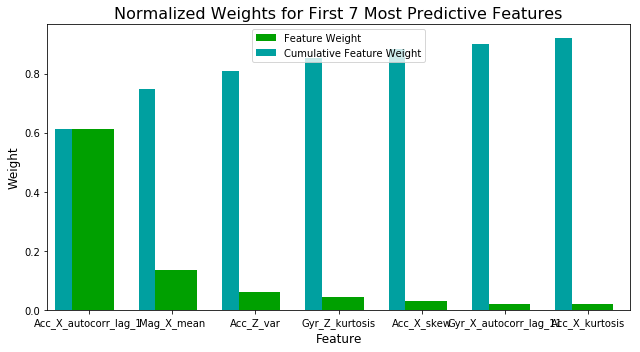

['Acc_X_autocorr_lag_1' 'Mag_X_mean' 'Acc_Z_var' 'Gyr_Z_kurtosis'
 'Acc_X_skew' 'Gyr_X_autocorr_lag_11' 'Acc_X_kurtosis']


In [22]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
# model = RandomForestClassifier(random_state=815)
model = DecisionTreeClassifier(random_state=815)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
columns = vs.feature_plot(importances, X_train, 7)
print(columns)

In [26]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = SVC(random_state=815)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C': [10, 100, 1000], 'gamma' : [0.00001, 0.0001, 0.001]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 2.0) 

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring = scorer, cv=3)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2.0)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2.0)))
best_clf

Unoptimized model
------
Accuracy score on testing data: 0.9712
F-score on testing data: 0.9899

Optimized Model
------
Final accuracy score on the testing data: 0.9970
Final F-score on the testing data: 0.9973


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=815, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
num_features = 76
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:num_features]]]
# print(X_train.columns.values[(np.argsort(importances)[::-1])[:num_features]])
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:num_features]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2.0)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 2.0)))

Final Model trained on full data
------
Accuracy on testing data: 0.9970
F-score on testing data: 0.9973

Final Model trained on reduced data
------
Accuracy on testing data: 0.9970
F-score on testing data: 0.9973


0.9954545454545455


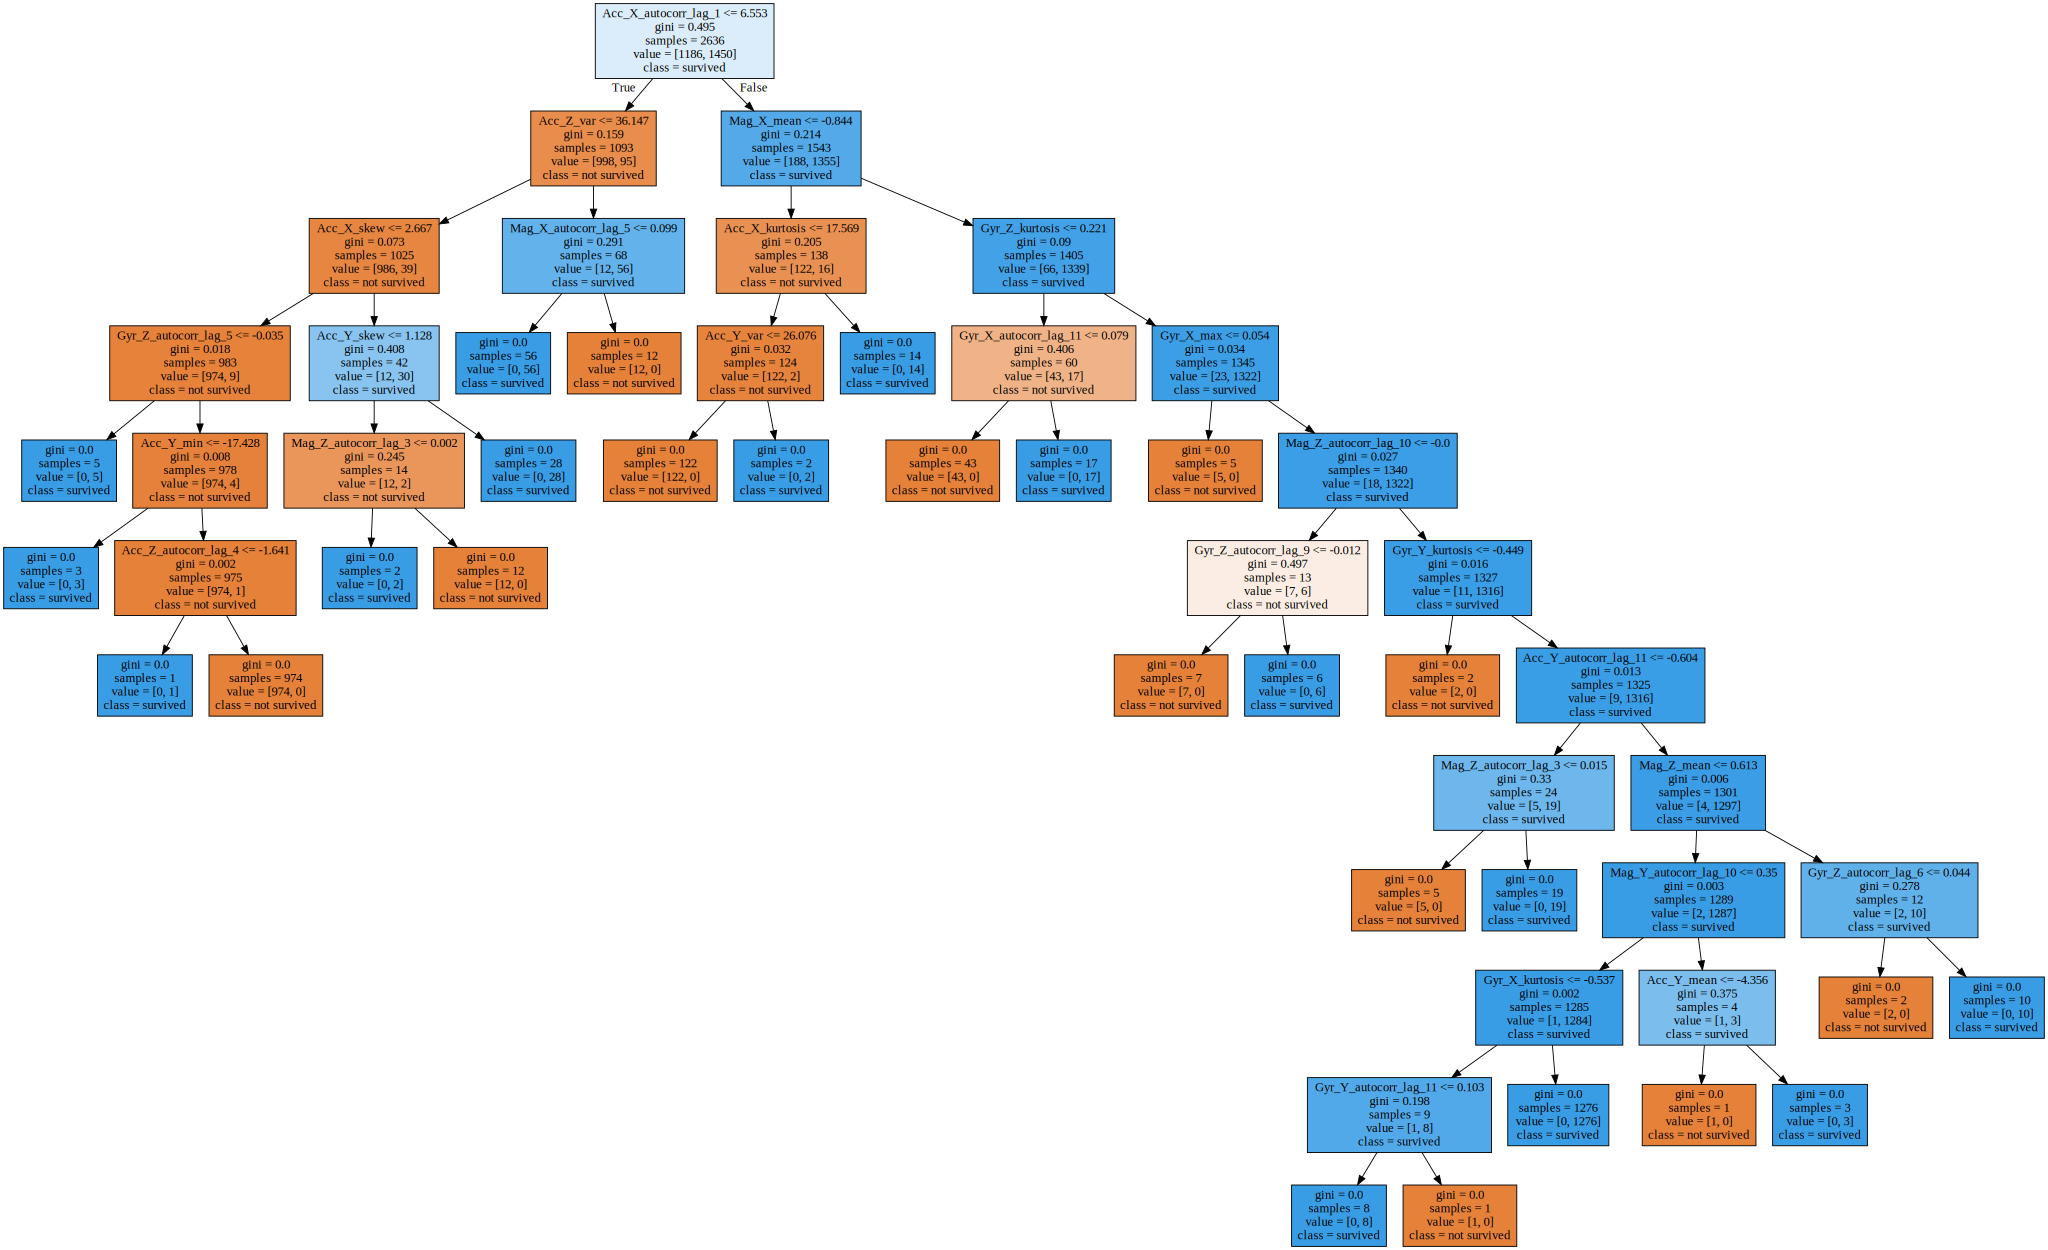

In [28]:
from sklearn import tree
import graphviz

def export_decision_tree(clf, feature_names):
    dot_data = tree.export_graphviz(clf,
                                    out_file=None,
                                    feature_names=feature_names,
                                    class_names=['not survived', 'survived'],
                                    filled=True)
    return graphviz.Source(dot_data)

clf = tree.DecisionTreeClassifier(max_depth=None, random_state=815).fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))
display(export_decision_tree(clf, X.columns))

In [19]:
import numpy as np
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [20]:
x = np.random.random(5)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [21]:
print(DFT_slow(x))

[ 1.14719123+0.j         -0.31207288+0.59093854j -0.05277079-0.14332895j
 -0.05277079+0.14332895j -0.31207288-0.59093854j]


In [58]:
import keras
num_features = 3
num_samples = 5

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(num_features,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# print(model.summary())

# Generate dummy data
import numpy as np
X_train = np.array([[0.36281267, 0.87354348, 0.13524148],
       [0.74585751, 0.63782977, 0.50821595],
       [0.44614269, 0.53937407, 0.02006342],
       [0.46607592, 0.19670535, 0.67609009],
       [0.76166826, 0.92813553, 0.49751404]])
#y_train = np.array([[0],
#       [1],
#       [0],
#       [1],
#       [1]])
y_train = np.array([0, 1, 0, 1, 1])

# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
5/5 [==============================] - 1s 165ms/step - loss: 0.7926 - acc: 0.4000
Epoch 2/10
5/5 [==============================] - 0s 445us/step - loss: 0.7799 - acc: 0.4000
Epoch 3/10
5/5 [==============================] - 0s 269us/step - loss: 0.7713 - acc: 0.4000
Epoch 4/10
5/5 [==============================] - 0s 283us/step - loss: 0.7640 - acc: 0.4000
Epoch 5/10
5/5 [==============================] - 0s 783us/step - loss: 0.7578 - acc: 0.4000
Epoch 6/10
5/5 [==============================] - 0s 956us/step - loss: 0.7523 - acc: 0.4000
Epoch 7/10
5/5 [==============================] - 0s 525us/step - loss: 0.7474 - acc: 0.4000
Epoch 8/10
5/5 [==============================] - 0s 723us/step - loss: 0.7428 - acc: 0.4000
Epoch 9/10
5/5 [==============================] - 0s 412us/step - loss: 0.7386 - acc: 0.4000
Epoch 10/10
5/5 [==============================] - 0s 425us/step - loss: 0.7347 - acc: 0.4000


In [59]:
X_test = np.array([[0.36281267, 0.87354348, 0.13524148]])
prediction = model.predict_classes(X_test)
prediction

array([[0]], dtype=int32)